In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

from matplotlib import rcParams
from sklearn.utils import resample

In [61]:
from utils.preprocess import preprocess_dataset
from utils.EDA import histogram, bivariate_analysis, get_correlation
# from utils.MLP_model import standardize_data, split_data, build_model_baseline, build_model_dropout, build_model_batch, compile_model_adam, compile_model_sdg, train_model, save_model, get_accuracy, plot_accuracy, predict, con_matrix, roc_curve_draw
from utils.MLP_model import *

In [5]:
client_data = pd.read_csv('Data/default_of_credit_card_clients.csv')
client_data.drop('ID', inplace=True, axis=1)
client_data.head(2)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1


In [6]:
client_data.rename(columns={"default payment next month": "target"}, inplace=True)
client_data.head(2)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,target
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1


In [7]:
preproccessed_data = preprocess_dataset(client_data)

Info:
-----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   LIMIT_BAL  30000 non-null  int64
 1   SEX        30000 non-null  int64
 2   EDUCATION  30000 non-null  int64
 3   MARRIAGE   30000 non-null  int64
 4   AGE        30000 non-null  int64
 5   PAY_0      30000 non-null  int64
 6   PAY_2      30000 non-null  int64
 7   PAY_3      30000 non-null  int64
 8   PAY_4      30000 non-null  int64
 9   PAY_5      30000 non-null  int64
 10  PAY_6      30000 non-null  int64
 11  BILL_AMT1  30000 non-null  int64
 12  BILL_AMT2  30000 non-null  int64
 13  BILL_AMT3  30000 non-null  int64
 14  BILL_AMT4  30000 non-null  int64
 15  BILL_AMT5  30000 non-null  int64
 16  BILL_AMT6  30000 non-null  int64
 17  PAY_AMT1   30000 non-null  int64
 18  PAY_AMT2   30000 non-null  int64
 19  PAY_AMT3   30000 non-null  int64
 20  PAY_AMT4   30000 non-null  int64
 21  

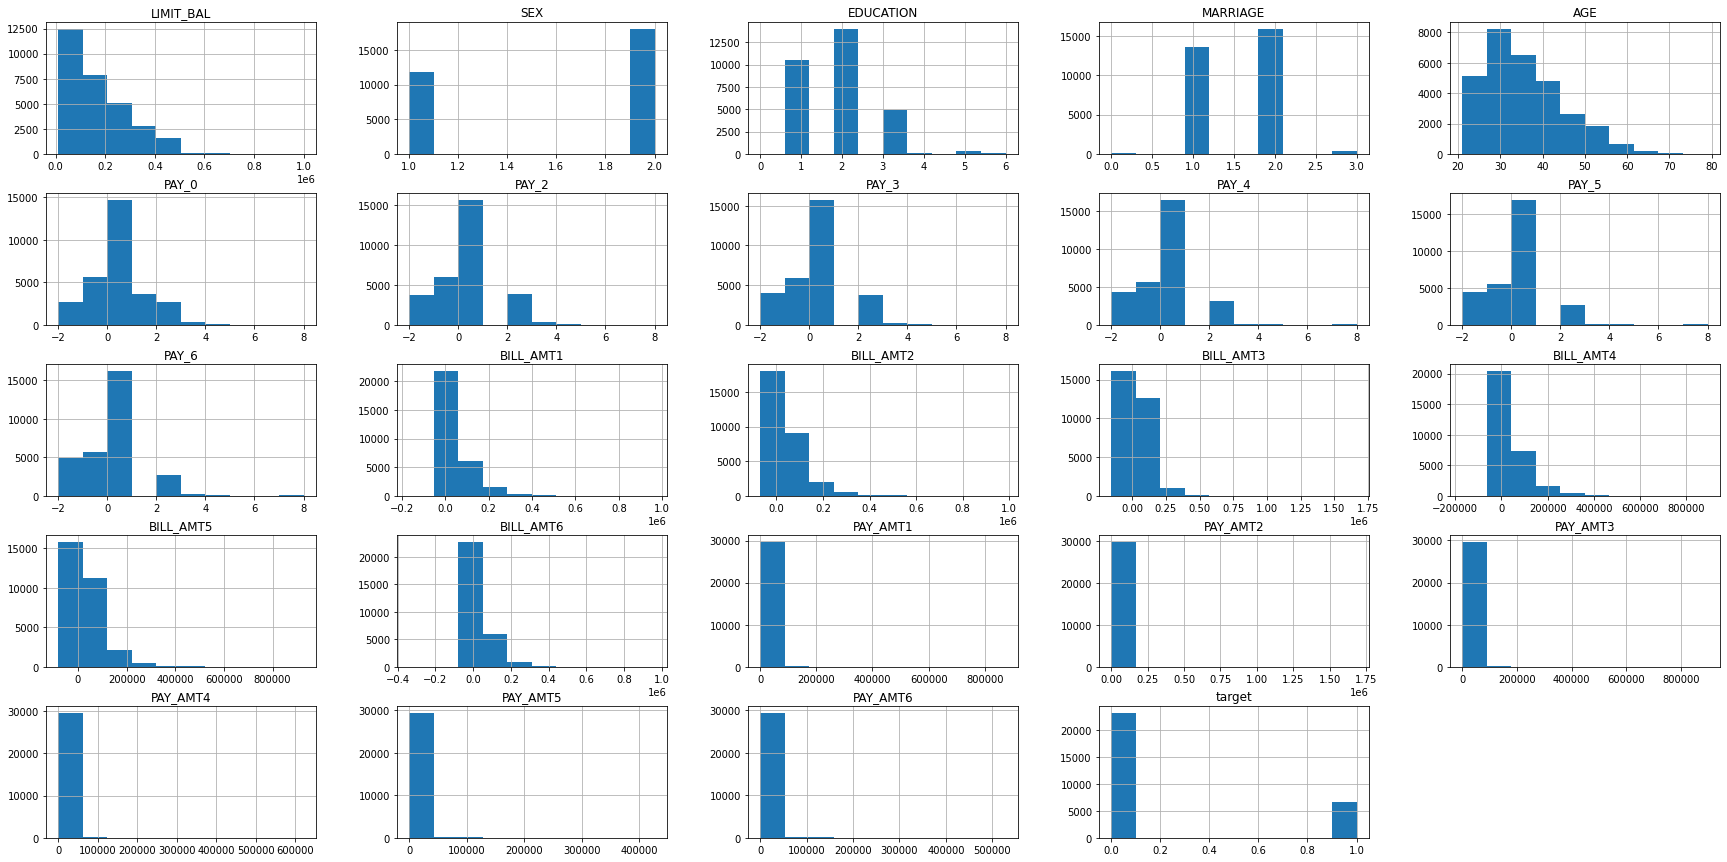

In [8]:
histogram(preproccessed_data)

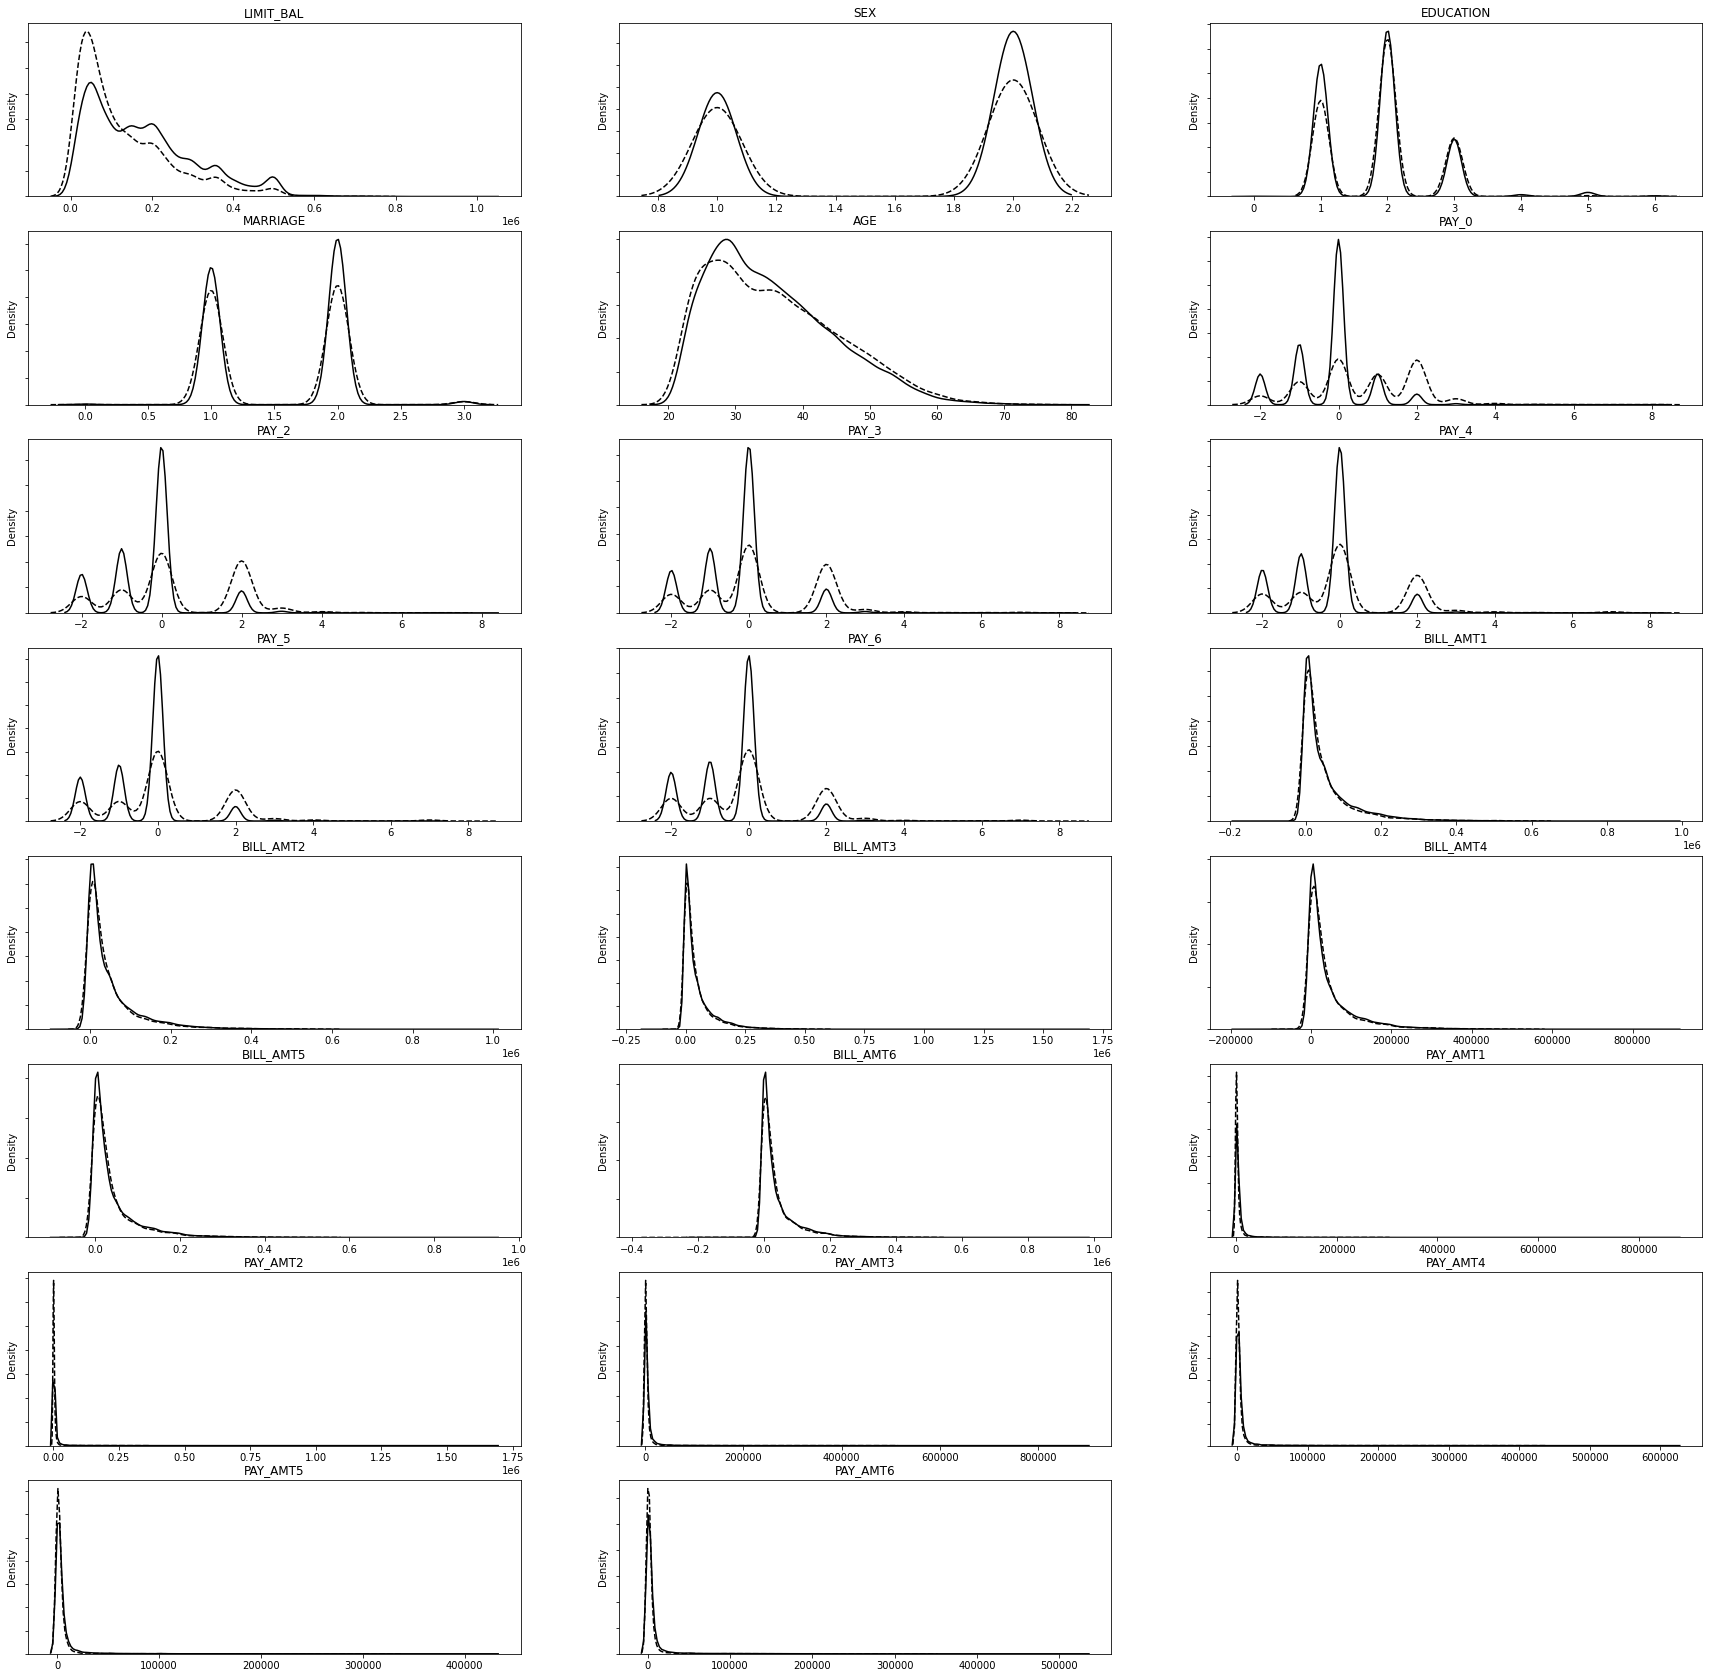

In [9]:
bivariate_analysis(preproccessed_data)

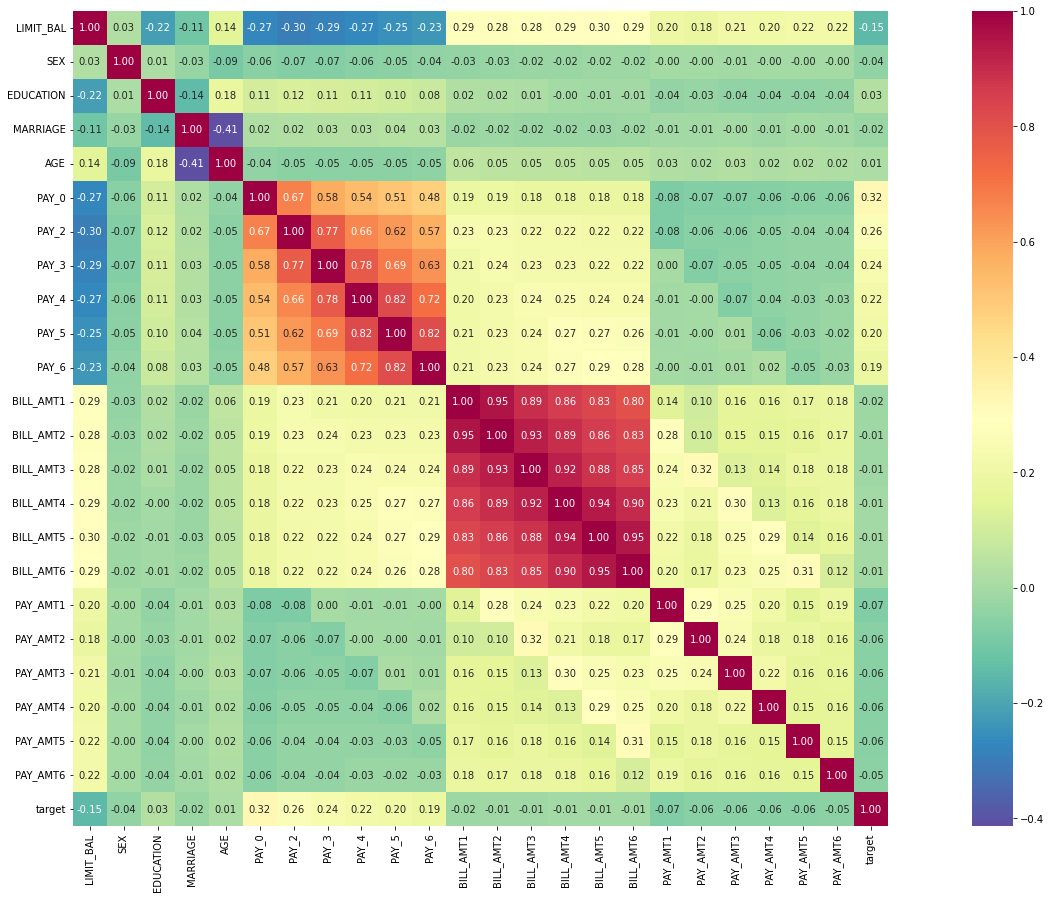

In [63]:
get_correlation(preproccessed_data)

In [10]:
# dealing with class imbalance
def resample_data(data):
    # Separate majority and minority classes
    df_majority = data[data.target==0]
    df_minority = data[data.target==1]
    
    # Upsample minority class
    df_minority_upsampled = resample(df_minority, 
                                    replace=True,     # sample with replacement
                                    n_samples=23335,    # to match majority class
                                    random_state=42) 
    
    # Combine majority class with upsampled minority class
    df_upsampled = pd.concat([df_majority, df_minority_upsampled])
    return df_upsampled

In [11]:
resampled_data = resample_data(preproccessed_data)
resampled_data.target.value_counts()

0    23335
1    23335
Name: target, dtype: int64

In [12]:
resampled_data.shape

(46670, 24)

In [13]:
x_features, target_variable = standardize_data(resampled_data)

Standardizing data...
---------------------


In [14]:
x_train, x_test, y_train, y_test = split_data(x_features, target_variable)

Splitting dataset...
--------------------


In [15]:
print("Feature matrix:", x_train.shape)
print("Target matrix:", y_train.shape)
print("Feature matrix:", x_test.shape)
print("Target matrix:", y_test.shape)

Feature matrix: (37336, 23)
Target matrix: (37336,)
Feature matrix: (9334, 23)
Target matrix: (9334,)


## MLP model baseline

In [16]:
model = build_model_baseline()

Building model...
-----------------


In [17]:
# compile model with adam optimizer
compile_model_adam(model)

Compiling the model with adam optimizer...
------------------------------------------


In [18]:
# train the model
history = train_model(model, x_train, y_train)

Training the model
------------------
Epoch 1/100
934/934 [==============================] - 4s 3ms/step - loss: 0.6010 - accuracy: 0.6825 - val_loss: 0.5816 - val_accuracy: 0.7001
Epoch 2/100
934/934 [==============================] - 2s 2ms/step - loss: 0.5754 - accuracy: 0.7014 - val_loss: 0.5794 - val_accuracy: 0.6995
Epoch 3/100
934/934 [==============================] - 2s 2ms/step - loss: 0.5684 - accuracy: 0.7059 - val_loss: 0.5712 - val_accuracy: 0.7062
Epoch 4/100
934/934 [==============================] - 2s 2ms/step - loss: 0.5632 - accuracy: 0.7106 - val_loss: 0.5681 - val_accuracy: 0.7035
Epoch 5/100
934/934 [==============================] - 2s 2ms/step - loss: 0.5601 - accuracy: 0.7133 - val_loss: 0.5678 - val_accuracy: 0.7066
Epoch 6/100
934/934 [==============================] - 3s 3ms/step - loss: 0.5579 - accuracy: 0.7133 - val_loss: 0.5679 - val_accuracy: 0.7073
Epoch 7/100
934/934 [==============================] - 3s 3ms/step - loss: 0.5569 - accuracy: 0.7164 - v

In [19]:
# save the model
save_model(model, "adam")

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers
......dense
.........vars
............0
............1
......dense_1
.........vars
............0
............1
......dense_2
.........vars
............0
............1
...metrics
......mean
.........vars
............0
............1
......mean_metric_wrapper
.........vars
............0
............1
...optimizer
......vars
.........0
.........1
.........10
.........11
.........12
.........2
.........3
.........4
.........5
.........6
.........7
.........8
.........9
...vars
Keras model archive saving:
File Name                                             Modified             Size
config.json                                    2023-02-28 17:29:35         1923
variables.h5                                   2023-02-28 17:29:35        33788
metadata.json                                  2023-02-28 17:29:35           64


In [20]:
# get model accuracy
get_accuracy(model, x_test, y_test, x_train, y_train)

Results:
--------
Training Accuracy: 72.92%

Training loss: 52.90%

Testing accuracy: 72.55%

Testing loss: 54.51%



In [23]:
# setting the figure parameters
rcParams['figure.figsize'] = (10, 5)

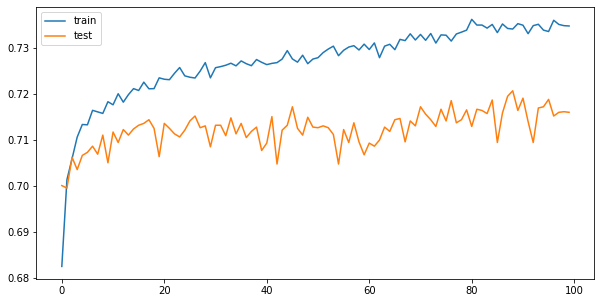

In [24]:
# plot the model accuracy
plot_accuracy(history, "adam")

In [25]:
# make predictions
y_pred = predict(model, x_test)

292/292 [==============================] - 1s 1ms/step


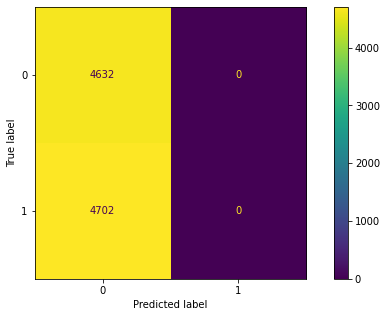

In [26]:
# plot the confusion matrix
con_matrix(y_test, y_pred, 'adam')

292/292 [==============================] - 0s 1ms/step


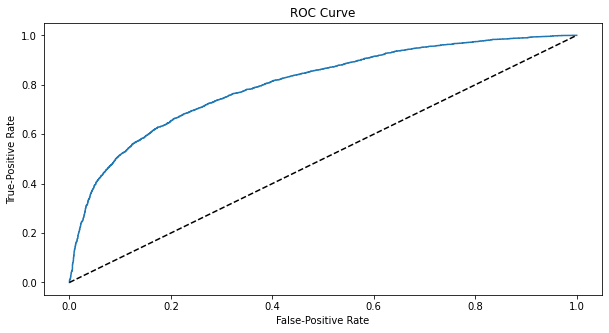

<Figure size 720x360 with 0 Axes>

In [27]:
# plot the roc curve
roc_curve_draw(model, x_test, y_test, 'adam')

## Using SGD Optimizer

In [28]:
# build model
model_sdg = build_model_baseline()

Building model...
-----------------


In [29]:
# compile model using SDG optimizer
compile_model_sdg(model_sdg)

Compiling the model with SGD optimizer...
-----------------------------------------


In [30]:
# train the model
history_sdg = train_model(model_sdg, x_train, y_train)

Training the model
------------------
Epoch 1/100
934/934 [==============================] - 3s 2ms/step - loss: 0.6498 - accuracy: 0.6092 - val_loss: 0.5887 - val_accuracy: 0.6934
Epoch 2/100
934/934 [==============================] - 3s 3ms/step - loss: 0.5805 - accuracy: 0.6985 - val_loss: 0.5764 - val_accuracy: 0.7001
Epoch 3/100
934/934 [==============================] - 3s 3ms/step - loss: 0.5709 - accuracy: 0.7070 - val_loss: 0.5709 - val_accuracy: 0.7017
Epoch 4/100
934/934 [==============================] - 2s 2ms/step - loss: 0.5655 - accuracy: 0.7102 - val_loss: 0.5726 - val_accuracy: 0.6966
Epoch 5/100
934/934 [==============================] - 2s 2ms/step - loss: 0.5628 - accuracy: 0.7118 - val_loss: 0.5681 - val_accuracy: 0.7054
Epoch 6/100
934/934 [==============================] - 2s 2ms/step - loss: 0.5609 - accuracy: 0.7120 - val_loss: 0.5681 - val_accuracy: 0.7047
Epoch 7/100
934/934 [==============================] - 2s 2ms/step - loss: 0.5587 - accuracy: 0.7130 - v

In [31]:
# save the model
save_model(model_sdg, "sgd")

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers
......dense
.........vars
............0
............1
......dense_1
.........vars
............0
............1
......dense_2
.........vars
............0
............1
...metrics
......mean
.........vars
............0
............1
......mean_metric_wrapper
.........vars
............0
............1
...vars
Keras model archive saving:
File Name                                             Modified             Size
config.json                                    2023-02-28 17:38:50         2137
variables.h5                                   2023-02-28 17:38:50        21100
metadata.json                                  2023-02-28 17:38:50           64


In [32]:
# print the model accuracy
get_accuracy(model_sdg, x_test, y_test, x_train, y_train)

Results:
--------
Training Accuracy: 74.28%

Training loss: 51.73%

Testing accuracy: 72.97%

Testing loss: 54.26%



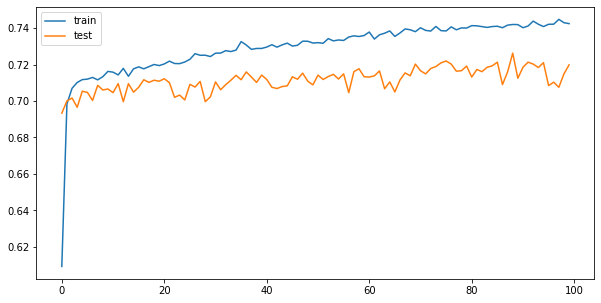

In [33]:
# plot the accuracy
plot_accuracy(history_sdg, "with_sgd")

In [34]:
# make predictions
y_pred_sdg = predict(model_sdg, x_test)

292/292 [==============================] - 0s 1ms/step


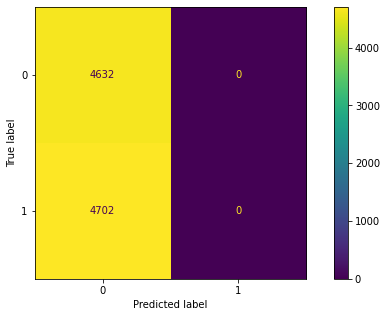

In [35]:
# plot the confusion matrix
con_matrix(y_test, y_pred_sdg, "with_sgd")

292/292 [==============================] - 0s 1ms/step


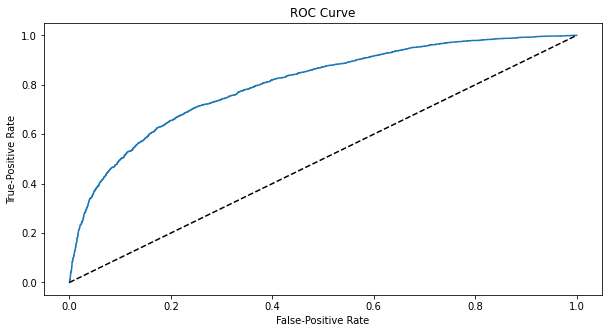

<Figure size 720x360 with 0 Axes>

In [36]:
# plot the roc curve
roc_curve_draw(model_sdg, x_test, y_test, "with_sgd")

## Model with Dropout

In [37]:
# build the model
model_drop = build_model_dropout()

Building model with dropout...
------------------------------


In [38]:
# compile the model
compile_model_sdg(model_drop)

Compiling the model with SGD optimizer...
-----------------------------------------


In [39]:
# train the model
history_drop = train_model(model_drop, x_train, y_train)

Training the model
------------------
Epoch 1/100
934/934 [==============================] - 3s 2ms/step - loss: 0.6480 - accuracy: 0.6134 - val_loss: 0.5867 - val_accuracy: 0.6978
Epoch 2/100
934/934 [==============================] - 2s 2ms/step - loss: 0.5899 - accuracy: 0.6954 - val_loss: 0.5766 - val_accuracy: 0.7001
Epoch 3/100
934/934 [==============================] - 2s 2ms/step - loss: 0.5809 - accuracy: 0.7035 - val_loss: 0.5703 - val_accuracy: 0.7034
Epoch 4/100
934/934 [==============================] - 3s 3ms/step - loss: 0.5785 - accuracy: 0.7034 - val_loss: 0.5718 - val_accuracy: 0.6966
Epoch 5/100
934/934 [==============================] - 3s 3ms/step - loss: 0.5755 - accuracy: 0.7035 - val_loss: 0.5702 - val_accuracy: 0.7057
Epoch 6/100
934/934 [==============================] - 2s 3ms/step - loss: 0.5748 - accuracy: 0.7057 - val_loss: 0.5672 - val_accuracy: 0.7053
Epoch 7/100
934/934 [==============================] - 2s 2ms/step - loss: 0.5707 - accuracy: 0.7066 - v

In [40]:
# save the model
save_model(model_drop, "with_dropout")

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers
......dense
.........vars
............0
............1
......dense_1
.........vars
............0
............1
......dense_2
.........vars
............0
............1
......dropout
.........vars
......dropout_1
.........vars
...metrics
......mean
.........vars
............0
............1
......mean_metric_wrapper
.........vars
............0
............1
...vars
Keras model archive saving:
File Name                                             Modified             Size
config.json                                    2023-02-28 17:45:20         2549
variables.h5                                   2023-02-28 17:45:20        26688
metadata.json                                  2023-02-28 17:45:20           64


In [41]:
# get the accuracy
get_accuracy(model_drop, x_test, y_test, x_train, y_train)

Results:
--------
Training Accuracy: 72.36%

Training loss: 53.74%

Testing accuracy: 72.17%

Testing loss: 54.46%



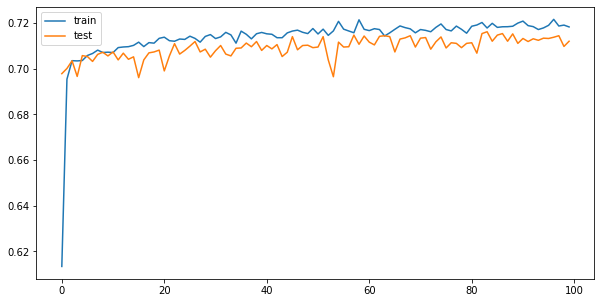

In [42]:
# plot the accuracy
plot_accuracy(history_drop, "with_dropout")

In [43]:
# make predictions
y_pred_drop = predict(model_drop, x_test)

292/292 [==============================] - 0s 1ms/step


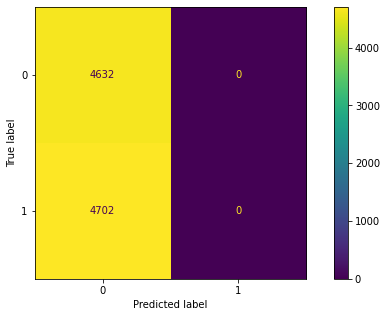

In [44]:
# plot confusion matrix
con_matrix(y_test, y_pred_drop, "with_dropout")

292/292 [==============================] - 0s 1ms/step


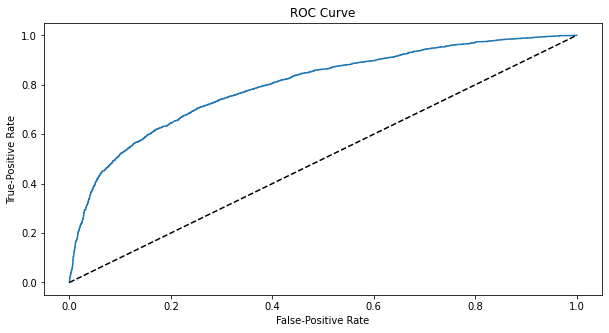

<Figure size 720x360 with 0 Axes>

In [46]:
# plot roc curve
roc_curve_draw(model_drop, x_test, y_test, "with_dropout")

## With Batch normalization

In [47]:
# build the model
model_batch = build_model_batch()

Building model with batch normalization...
------------------------------------------


In [48]:
# compile the model
compile_model_sdg(model_batch)

Compiling the model with SGD optimizer...
-----------------------------------------


In [49]:
# train the model
history_batch = train_model(model_batch, x_train, y_train)

Training the model
------------------
Epoch 1/100
934/934 [==============================] - 4s 3ms/step - loss: 0.5952 - accuracy: 0.6847 - val_loss: 0.5819 - val_accuracy: 0.6893
Epoch 2/100
934/934 [==============================] - 4s 4ms/step - loss: 0.5836 - accuracy: 0.6979 - val_loss: 0.5741 - val_accuracy: 0.7081
Epoch 3/100
934/934 [==============================] - 3s 3ms/step - loss: 0.5779 - accuracy: 0.6984 - val_loss: 0.5708 - val_accuracy: 0.7009
Epoch 4/100
934/934 [==============================] - 3s 3ms/step - loss: 0.5788 - accuracy: 0.6982 - val_loss: 0.5690 - val_accuracy: 0.7063
Epoch 5/100
934/934 [==============================] - 3s 3ms/step - loss: 0.5767 - accuracy: 0.6993 - val_loss: 0.5675 - val_accuracy: 0.7007
Epoch 6/100
934/934 [==============================] - 3s 4ms/step - loss: 0.5750 - accuracy: 0.7003 - val_loss: 0.5662 - val_accuracy: 0.7043
Epoch 7/100
934/934 [==============================] - 4s 4ms/step - loss: 0.5749 - accuracy: 0.7009 - v

In [50]:
# save the model
save_model(model_batch, "with_batch_normalization")

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers
......batch_normalization
.........vars
............0
............1
............2
............3
......batch_normalization_1
.........vars
............0
............1
............2
............3
......dense
.........vars
............0
............1
......dense_1
.........vars
............0
............1
......dense_2
.........vars
............0
............1
......dropout
.........vars
......dropout_1
.........vars
...metrics
......mean
.........vars
............0
............1
......mean_metric_wrapper
.........vars
............0
............1
...vars
Keras model archive saving:
File Name                                             Modified             Size
config.json                                    2023-02-28 17:52:39         3669
variables.h5                                   2023-02-28 17:52:39        33088
metadata.json                                  2023-02-28 17:52:39           64


In [51]:
# get the accuracy
get_accuracy(model_batch, x_test, y_test, x_train, y_train)

Results:
--------
Training Accuracy: 71.92%

Training loss: 54.73%

Testing accuracy: 71.22%

Testing loss: 55.17%



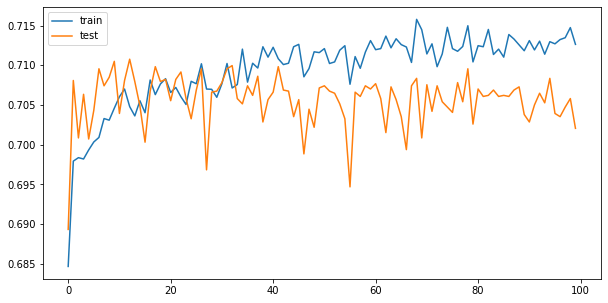

In [52]:
# plot the accuracy
plot_accuracy(history_batch, "with_batch_normalization")

In [53]:
# make predictions
y_pred_batch = predict(model_batch, x_test)

292/292 [==============================] - 1s 1ms/step


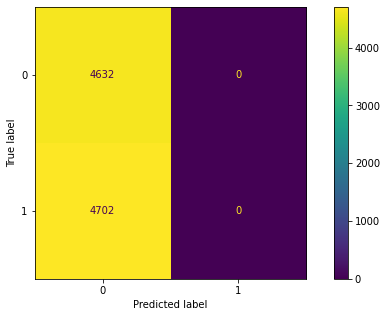

In [54]:
# plot confusion matrix
con_matrix(y_test, y_pred_batch, "with_batch_normalization")

292/292 [==============================] - 1s 1ms/step


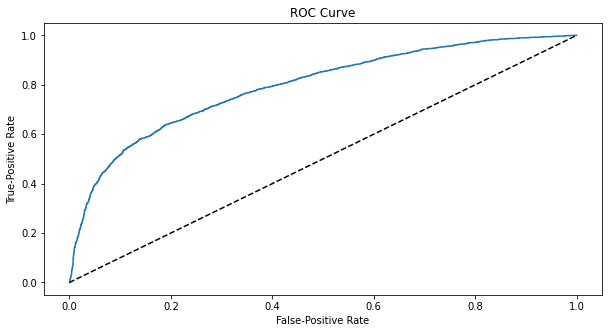

<Figure size 720x360 with 0 Axes>

In [55]:
# plot roc curve
roc_curve_draw(model_batch, x_test, y_test, "with_batch_normalization")

In [56]:
# manually create accuracy dataframe
accuracy_data = [[71.44, 71.35, 'Adam'], [74.28, 72.97, 'SDG'], [72.36, 72.17, 'Dropout'], [71.92, 71.22, 'Batch_normalization']]
accuracy_df = pd.DataFrame(data=accuracy_data, columns=["Train", "Test", "Hyperparameters"])
accuracy_df

,Train,Test,Hyperparameters
0,71.44,71.35,Adam
1,74.28,72.97,SDG
2,72.36,72.17,Dropout
3,71.92,71.22,Batch_normalization


In [57]:
# define function to plot accuracy for all hyperparameters
def plot_accuracy_all(data, x, y, alias_):
    ax = sns.barplot(data=data, x=x, y=y)
    # sns.barplot(data=accuracy_df, x="Hyperparameters", y="Test")
    for i in ax.containers:
        ax.bar_label(i,)
    plt.savefig(f'accuracy_{alias_}.png')
    plt.show()

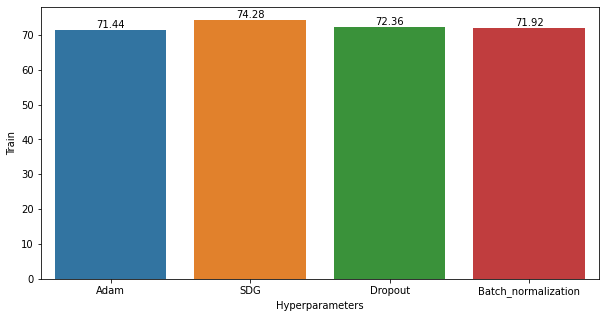

In [58]:
# plot for train accuracy
plot_accuracy_all(accuracy_df, accuracy_df.Hyperparameters, accuracy_df.Train, "train")

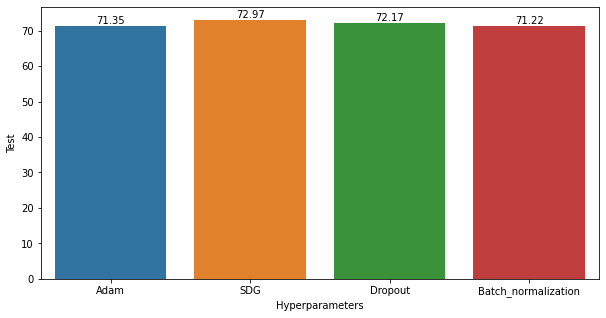

In [59]:
# plot for test accuracy
plot_accuracy_all(accuracy_df, accuracy_df.Hyperparameters, accuracy_df.Test, "test")